<a href="https://colab.research.google.com/github/mutturajiu/BA05-TRIM02-Module-04-Text-Analytics-/blob/master/Text_Analytics_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import tweepy as tw
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
from textblob import TextBlob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
tweets_text = pd.read_csv("tweets.csv")

In [0]:
data = tweets_text.readlines()[0:5] 
#print(data) 
#Open the file, if it is closed 
#data = file.readlines() 
no_records = len(data) 
print(no_records)

AttributeError: ignored

In [0]:
tweets=tweets_text.Tweets

In [0]:
tweets[0:5]

0    'PM @narendramodi will create more efficiency ...
1    The central government had no outstanding #loa...
2    Why Modi government 2.0 might have to change i...
3    @BhavikaKapoor5 Whenever and wherever the gove...
4    India’s growth rate ‘much weaker than expected...
Name: Tweets, dtype: object

Cleanup text before conducting detailed text analysis. We will do following-

1. Remove stop words such as “will”, “and”, “I” etc.

2. Remove URLs, Twitter handle, emojis, special characters etc.

3. Bring all texts to lower case

4. Stem words to orginal form such as “Running” to “Run”

In [0]:
corpus = [] # form an empty list called corpus
ps = PorterStemmer() # for stemming the words to original form, for example - "running to run"
stop_words = set(stopwords.words('english')) # remove words such as will, I, and, at etc.
for i in range(0, 1000): # iterate through the list of 1000 tweets
  # remove handles (@), numbers, urls, emojis and any other special characters to have only text
  tweets_cln = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|[0-9]", '',tweets[i])
  # convert all words to lower case
  tweets_cln = tweets_cln.lower()
  # split sentences into words
  tweets_cln = tweets_cln.split()
 # remove English stop words
  tweets_cln = [x for x in tweets_cln if not x in stop_words]
  # stem words to the base form
  #tweets_text_cln = [ps.stem(x) for x in tweets_text_cln]
  # join words to form the original sentences
  tweets_cln = " ".join(tweets_cln)
  # append to the list to get all Tweets in one place
  corpus.append(tweets_cln)

In [0]:
corpus

['pm create efficiency economy',
 'central government outstanding loans week earlier well',
 'modi government might change political economy script via',
 'whenever wherever government start depending corrupt businessmen overall health',
 'indias growth rate much weaker expected imfimf internationalmonetaryfund',
 'south india reason india less developedomg kid really go c',
 'hmmm growth premium devices india q apriljune price bracket rs w',
 'banks remain shut days due strikes holidays',
 'totally destroy save us understand sacred economy nature india politics ramrajya',
 'dont hate millennials millennials driving force indian economy india crore millennia',
 'ghazwa e hind lolkeep reading comic books th century dessert cult lolindia worlds r',
 'india poor public infrastructure roads flyovers footpaths parks etc missing india invests',
 'office india eagerly waiting',
 'irctc run delhilucknow tejas express laced highend facilities releases complete train schedule',
 'india doesnt ne

In [0]:
bagofwords = []
for i in range(0,1000):
  words = corpus[i].split()
  bagofwords.append(words)

In [0]:
bagofwords[0]

['pm', 'create', 'efficiency', 'economy']

In [0]:
all_words = list(itertools.chain(*bagofwords))
print(all_words[0:10])
print()
print("Most commonly occuring words and frequency")

['pm', 'create', 'efficiency', 'economy', 'central', 'government', 'outstanding', 'loans', 'week', 'earlier']

Most commonly occuring words and frequency


In [0]:
words_to_remove=['pm', 'create', 'efficiency', 'economy', 'central', 'government', 'outstanding', 'loans', 'week', 'earlier']
bagofwords_new=[[x for x in word if not x in words_to_remove] for word in bagofwords]

In [0]:
all_words = list(itertools.chain(*bagofwords_new))
print(all_words[0:10])
print()
print("Most commonly occuring words and frequency")
words_freq=collections.Counter(all_words)
words_freq.most_common(20)

['well', 'modi', 'might', 'change', 'political', 'script', 'via', 'whenever', 'wherever', 'start']

Most commonly occuring words and frequency


[('india', 426),
 ('indias', 132),
 ('indian', 64),
 ('modi', 57),
 ('growth', 54),
 ('amp', 53),
 ('much', 48),
 ('economic', 48),
 ('trillion', 44),
 ('via', 35),
 ('expected', 35),
 ('people', 35),
 ('dont', 34),
 ('world', 34),
 ('imf', 34),
 ('one', 33),
 ('billion', 33),
 ('weaker', 32),
 ('pakistan', 32),
 ('minister', 32)]

In [0]:
freq_word_df=pd.DataFrame(words_freq.most_common(20), columns=['Words','Freq'])
freq_word_df.head()

,Words,Freq
0,india,426
1,indias,132
2,indian,64
3,modi,57
4,growth,54


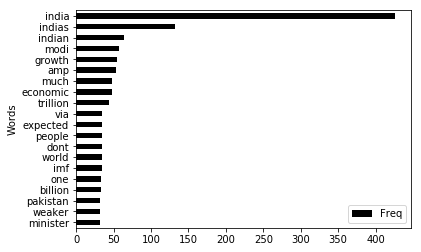

In [0]:
freq_word_df.sort_values(by='Freq').plot.barh(x='Words',y='Freq',color="black")
plt.show;

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
word_string=" ".join(freq_word_df.Words)
wordcloud = WordCloud(#stopwords=STOPWORDS,
                     background_color='black',
                     max_words=20
                     ).generate(word_string)

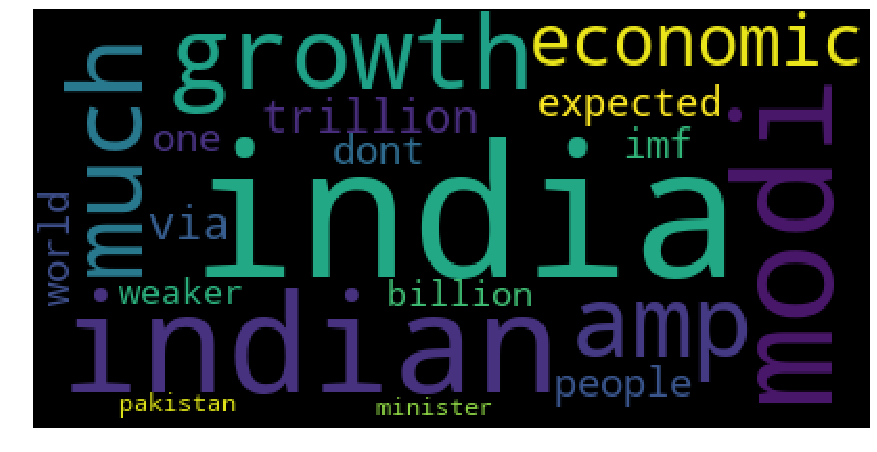

In [0]:
plt.figure(figsize=(15,10))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [0]:
sentiment_text=[TextBlob(tweet) for tweet in corpus]
print(sentiment_text[10].polarity)
print(sentiment_text[0])

0.25
pm create efficiency economy


In [0]:
sentiments=[[tweet.sentiment.polarity,str(tweet)] for tweet in sentiment_text]
sentiment_df=pd.DataFrame(sentiments,columns=["Polarity", "Tweet_Text"])
sentiment_df.sort_values(by="Polarity", ascending=False)

,Polarity,Tweet_Text
321,1.000000,feeling concerned economy government india try...
941,1.000000,itc best company india going economy india fin...
993,1.000000,thinking indias economy rising excellent
424,1.000000,best please vote bjp coming election aap suppo...
56,0.933333,india must determine best economy billion indi...
54,0.900000,india must determine best economy billion indi...
58,0.800000,madam country withyou worries india amp econom...
664,0.800000,gandhi great ask king n pm concentrate crumbli...
751,0.800000,u must studied madarsepakistans economy great ...
618,0.800000,great effort tons gold reached england britain...


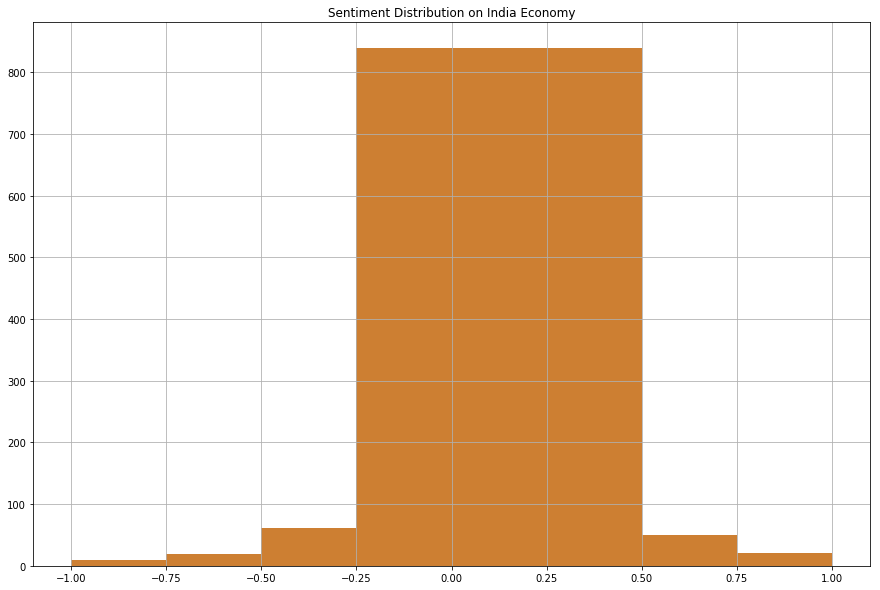

In [0]:
fig, ax = plt.subplots(figsize=(15, 10))
# plot histogram of the polarity values
sentiment_df.hist(bins=[-1,-0.75,-0.5,-0.25,0.5,0.75,1], ax=ax, color="#CD7F32")
plt.title("Sentiment Distribution on India Economy")
plt.show();